# AutoEncoder

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('../dataset/DSA_features.csv')
# df = pd.read_csv('../dataset/ae_data.csv')

df.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1


In [4]:
df.describe()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_min,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew
count,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000,...,9120.000000,9.120000e+03,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000,9.120000e+03,9120.000000,9120.000000
mean,7.765766,14.625536,3.602974,17.807013,2.454290,0.305587,-0.811036,1.801847,-3.704204,2.049747,...,0.111347,1.818862e-02,0.105897,-0.055440,0.064504,0.169687,-0.052866,7.624694e-03,0.059342,-0.089861
std,3.758022,11.823448,5.622855,45.188787,3.432895,0.768360,2.201692,4.177165,3.982579,3.908675,...,0.362373,2.382393e-02,0.083518,0.526959,0.346660,0.360190,0.359712,1.903445e-02,0.064059,0.619636
min,-11.575660,-4.758700,-99.715000,0.000135,0.011633,-7.826631,-9.782885,-9.703600,-49.941000,0.000141,...,-0.901760,3.044156e-07,0.000552,-3.693948,-0.912397,-0.910830,-1.126000,2.960874e-07,0.000544,-5.111532
25%,8.374161,9.523200,0.000000,0.036855,0.191977,-0.161535,-1.134192,0.172375,-4.837875,0.012121,...,-0.111835,5.683172e-04,0.023839,-0.343123,-0.156271,-0.035821,-0.326125,2.227543e-04,0.014925,-0.402781
50%,9.186328,12.549500,5.757900,2.241468,1.497153,0.275042,-0.375678,1.571750,-2.470150,0.737663,...,0.184470,1.078612e-02,0.103856,-0.075786,0.086285,0.210825,-0.040447,1.813539e-03,0.042586,-0.092036
75%,9.515573,15.843250,7.649075,6.680571,2.584680,0.845410,0.127612,3.005450,-1.279725,1.900426,...,0.315962,2.740661e-02,0.165549,0.177076,0.295415,0.422270,0.206933,6.927870e-03,0.083234,0.228493
max,10.713139,93.694000,9.749000,392.898630,19.821671,9.070164,7.051530,41.013000,2.656400,54.332000,...,0.969020,3.041940e-01,0.551538,5.035185,1.020691,1.042600,0.999440,2.790198e-01,0.528223,3.560828


In [5]:
np.unique(df['activity'], return_counts=True)

(array(['ascendingStairs', 'basketBall', 'crossTrainer',
        'cyclingHorizontal', 'cyclingVertical', 'decendingStairs',
        'jumping', 'lyingBack', 'lyingRigh', 'movingInElevator', 'rowing',
        'runningTreadmill', 'sitting', 'standing',
        'standingInElevatorStill', 'stepper', 'walkingLot',
        'walkingTreadmillFlat', 'walkingTreadmillIncline'], dtype=object),
 array([480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480,
        480, 480, 480, 480, 480, 480], dtype=int64))

In [6]:
# Null값 확인
df.isna().values.any()

False

In [7]:
# 관심있는 3가지 activity 추출
df = df.loc[df['activity'].isin(['lyingRigh', 'lyingBack', 'jumping'])]
df['activity'].value_counts()

activity
lyingBack    480
lyingRigh    480
jumping      480
Name: count, dtype: int64

각 class가 동일한 비율로 분포한다.

In [9]:
df.shape

(1440, 272)

In [10]:
# Null값 확인
df.isna().values.any()

False

In [11]:
abnormal = df[df.activity == 'jumping']
normal = df[df.activity.isin(['lyingRigh', 'lyingBack'])]

abnormal.shape, normal.shape

((480, 272), (960, 272))

In [12]:
df['class'] = df['activity'].apply(lambda x: 'normal' if x.startswith('lying') else 'abnormal')
df.columns

Index(['T_xacc_mean', 'T_xacc_max', 'T_xacc_min', 'T_xacc_var', 'T_xacc_std',
       'T_xacc_skew', 'T_yacc_mean', 'T_yacc_max', 'T_yacc_min', 'T_yacc_var',
       ...
       'LL_ymag_skew', 'LL_zmag_mean', 'LL_zmag_max', 'LL_zmag_min',
       'LL_zmag_var', 'LL_zmag_std', 'LL_zmag_skew', 'activity', 'people',
       'class'],
      dtype='object', length=273)

In [13]:
data = df.drop(['activity', 'people'], axis=1)
data.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,class
960,-4.834646,-4.7185,-4.9049,0.001124,0.033529,0.632141,-0.501018,-0.41744,-0.59561,0.001016,...,9.725263e-07,0.000986,0.074676,-0.532664,-0.52993,-0.53521,9.585668e-07,0.000979,-0.193301,normal
961,-4.780810,-4.5850,-4.8833,0.003948,0.062835,1.052880,-0.480601,-0.40372,-0.63184,0.001297,...,6.211659e-07,0.000788,-0.181526,-0.531169,-0.52940,-0.53365,7.608973e-07,0.000872,-0.372381,normal
962,-4.804400,-4.7037,-4.8755,0.001482,0.038496,0.735226,-0.493925,-0.42616,-0.59561,0.000863,...,4.579046e-07,0.000677,-0.263115,-0.530569,-0.52873,-0.53222,5.160537e-07,0.000718,0.185587,normal
963,-4.750563,-4.5696,-4.8977,0.004447,0.066683,0.710263,-0.437358,-0.30877,-0.55225,0.003587,...,4.703523e-07,0.000686,-0.060925,-0.531167,-0.52962,-0.53283,4.975523e-07,0.000705,-0.145321,normal
964,-4.774916,-4.6741,-4.8457,0.001080,0.032868,0.324779,-0.459456,-0.38900,-0.53714,0.001059,...,5.467316e-07,0.000739,0.335811,-0.529804,-0.52706,-0.53251,1.292131e-06,0.001137,-0.026271,normal


C:\Users\user\AppData\Local\Temp\ipykernel_13820\4092775785.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['class'], sort = True)


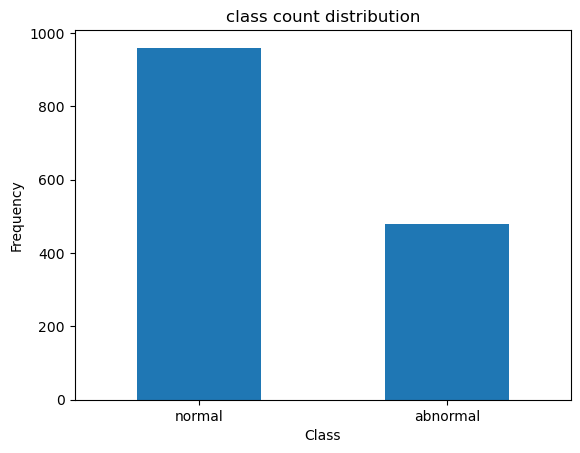

class
normal      960
abnormal    480
Name: count, dtype: int64

In [14]:
count_classes = pd.value_counts(df['class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("class count distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

df['class'].value_counts()

불필요한 activity, people column을 drop한 뒤 진행한다. 

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# normal Train data
X_train = normal.drop(['activity', 'people'], axis=1)

# mixed test data
X_mix = df.iloc[:, :-1].drop(['activity', 'people'], axis=1)
y_mix = df.iloc[:, -1]
y_mix = le.fit_transform(y_mix)

In [17]:
mapping = {label: idx for idx, label in enumerate(le.classes_)}
mapping

{'abnormal': 0, 'normal': 1}

### Scaling

In [19]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_mix = ss.transform(X_mix)

Train data 정보만 알고있고, Test data에 대한 정보는 모른다는 가정으로 시작하므로, Train data로 학습시킨 Standard Scaler로 Test data를 정규화한다.

In [20]:
pd.DataFrame(X_mix).describe()

,0,1,2,3,4,5,6,7,8,9,...,260,261,262,263,264,265,266,267,268,269
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,...,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,1.244336,4.898885,-0.707967,1545.726857,78.895110,0.570590,0.254535,0.628104,-0.301579,101.967709,...,-0.202683,2.978025,2.426134,0.191376,0.285747,0.333564,0.246303,4.329762,2.866545,0.168371
std,1.944848,7.351426,1.451959,2627.869101,118.204307,1.217168,0.902388,1.306350,1.075388,202.364756,...,0.919015,7.433872,4.223931,0.945037,1.029983,1.053734,1.010893,15.184277,5.669037,1.142701
min,-1.290339,-1.301928,-6.334038,-0.123895,-0.586595,-3.733687,-1.245434,-1.248496,-5.547346,-0.165008,...,-1.635833,-0.143539,-0.366506,-7.570447,-1.129855,-1.140545,-1.127377,-0.132934,-0.433801,-9.889386
25%,-0.626095,-0.630638,-1.344713,-0.106386,-0.291500,-0.227562,-0.828784,-0.808308,-1.059968,-0.126839,...,-0.999662,-0.142674,-0.333358,-0.310084,-0.452926,-0.451316,-0.452334,-0.131293,-0.384334,-0.301307
50%,0.776920,0.883007,-0.746231,-0.071716,0.033909,0.560923,0.722983,0.895943,-0.556328,-0.085181,...,-0.150817,-0.136373,-0.197240,0.114599,-0.080210,-0.054673,-0.117002,-0.122017,-0.216456,0.170622
75%,3.646516,11.675924,0.299497,2806.655701,191.243752,1.326925,0.918578,1.404514,0.821977,85.658875,...,0.613429,2.874210,4.569195,0.588316,1.220275,1.255588,1.189080,3.642449,5.524780,0.732797
max,4.288414,34.071472,2.038743,12976.313236,412.160573,6.940248,1.426649,7.080938,1.442176,1275.537284,...,1.603300,47.712489,19.561859,8.427803,2.523419,2.524723,2.526721,136.017311,36.033966,3.884292


normal data의 train data와 비슷하게 정규화 되었겠지만, abnormal data는 그렇지 않을 것이다.

### Train model

In [23]:
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [65]:
# 오토인코더
def construct_model(input_size, encoding_dim):
    
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(encoding_dim, activation='relu')(input_layer)
    encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
    encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
    encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
    
    decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
    decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
    decoded = Dense(input_dim, activation='sigmoid')(decoded)

    return Model(inputs=input_layer, outputs=decoded)

In [67]:
input_dim = X_train.shape[1]
encoding_dim = 64  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

autoencoder = construct_model(input_dim, encoding_dim)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 270)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │          17,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 270)                 │           8,910 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,502 (123.05 KB)

 Trainable params: 31,502 (123.05 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
# 3. 모델 학습
# 훈련데이터의 0.1 을 validation data로 사용
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = autoencoder.fit(X_train, X_train, 
                          epochs=50, 
                          batch_size=32, 
                          shuffle=True, 
                          callbacks=[early_stopping_cb],
                          validation_split = 0.1)

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 1.1368 - val_loss: 0.7941
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0381 - val_loss: 0.6791
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9702 - val_loss: 0.6561
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8505 - val_loss: 0.6522
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9583 - val_loss: 0.6473
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0174 - val_loss: 0.6389
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0938 - val_loss: 0.6347
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7452 - val_loss: 0.6337
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8358 - val_loss: 0.6323
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7316 - val_loss: 0.6315
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0446 - val_loss: 0.6286
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8968 - val_l

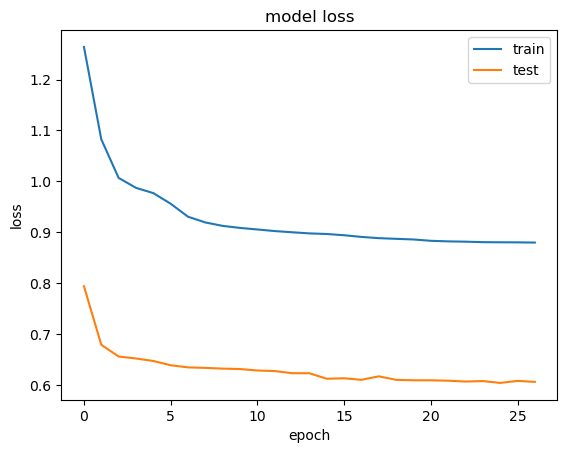

In [70]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [73]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder.predict(X_mix)
mse = np.mean(np.abs(X_mix - predictions), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_mix})
error_df.describe()

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,reconstruction_error,true_class
count,1440.000000,1440.000000
mean,65.240015,0.666667
std,105.661587,0.471568
min,0.259058,0.000000
25%,0.373218,0.000000
50%,0.445949,1.000000
75%,117.791697,1.000000
max,606.339075,1.000000


위에서 Normal data로 학습시킨 Standard Scaler로 Mix data를 정규화했기 때문에 값의 편차가 크다. 따라서 손실함수로 MSE가 아닌 MAE를 채택했다.

In [81]:
error_df.head()

,reconstruction_error,true_class
0,0.303333,1
1,0.315122,1
2,0.294857,1
3,0.331422,1
4,0.300684,1


In [89]:
threshold=40

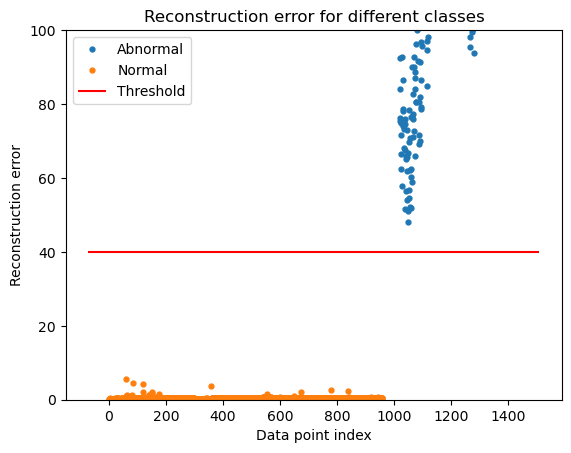

In [91]:
import matplotlib.pyplot as plt
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()
ax.set_ylim(0, 100)

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Abnormal" if name == 0 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

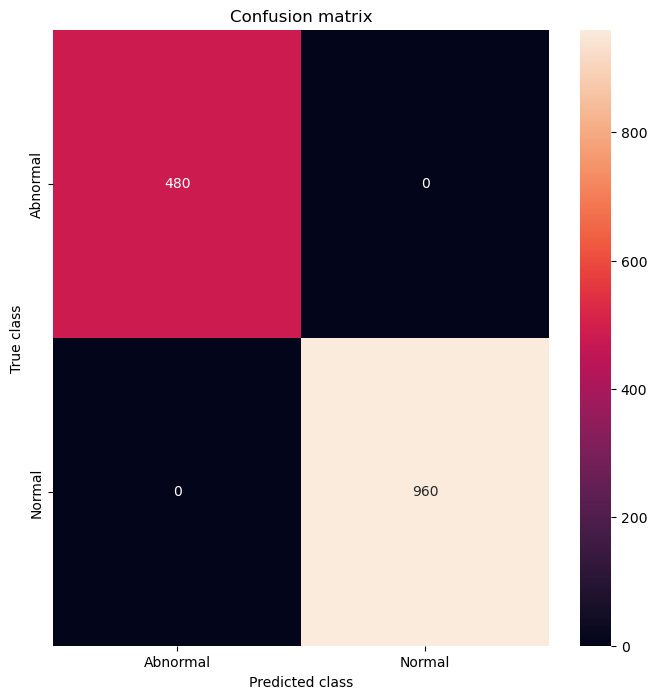

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       480
           1       1.00      1.00      1.00       960

    accuracy                           1.00      1440
   macro avg       1.00      1.00      1.00      1440
weighted avg       1.00      1.00      1.00      1440



In [93]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [0 if e > threshold else 1 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=['Abnormal', 'Normal'], yticklabels=['Abnormal', 'Normal'], annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))